In [1]:
import numpy  as np
import pandas as pd

## Carga de datos

In [2]:
train = pd.read_csv('train_set.csv')

## Descriptivo 

In [3]:
columns = train.columns

In [4]:
train = pd.DataFrame(train)

In [5]:
train.count()

ID                               55200
order_status                     52481
order_products_value             52500
order_freight_value              52508
order_items_qty                  52436
order_sellers_qty                52582
order_purchase_timestamp         52566
order_aproved_at                 52480
order_estimated_delivery_date    52489
order_delivered_customer_date    51198
customer_city                    52555
customer_state                   52552
customer_zip_code_prefix         52440
product_category_name_english    52601
product_name_lenght              52508
product_description_lenght       52493
product_photos_qty               52477
target                           55200
dtype: int64

In [6]:
train.pivot_table('ID','target','order_status',aggfunc=np.count_nonzero)

order_status,canceled,delivered,invoiced,processing,shipped,unavailable
target,,,,,,
1,198.0,5359.0,121.0,178.0,390.0,5.0
2,15.0,1718.0,6.0,7.0,43.0,NaN
3,17.0,4454.0,17.0,9.0,73.0,NaN
4,7.0,10062.0,9.0,1.0,55.0,NaN
5,21.0,29616.0,16.0,7.0,76.0,NaN


In [77]:
train.groupby('target').count()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty
target,,,,,,,,,,,,,,,,,
1,6584,6251,6276,6295,6261,6269,6268,6245,6283,5363,6318,6265,6244,6272,6279,6264,6279
2,1892,1789,1783,1802,1799,1808,1805,1793,1816,1720,1808,1799,1789,1811,1805,1806,1800
3,4802,4570,4581,4556,4562,4573,4567,4557,4573,4453,4596,4601,4546,4562,4572,4564,4549
4,10655,10134,10124,10153,10121,10145,10153,10135,10132,10046,10096,10143,10146,10151,10162,10153,10144
5,31267,29737,29736,29702,29693,29787,29773,29750,29685,29616,29737,29744,29715,29805,29690,29706,29705


In [7]:
train_nuevo = train.copy()

In [8]:
train_nuevo['fecha_deliveried_estdelivery']  =  (pd.to_datetime(train['order_delivered_customer_date']) - pd.to_datetime(train['order_estimated_delivery_date'])).dt.days
train_nuevo['fecha_deliveried_orderaproved']  =  (pd.to_datetime(train['order_delivered_customer_date']) - pd.to_datetime(train['order_aproved_at'])).dt.days
train_nuevo['fecha_deliveried_purchased']  =  (pd.to_datetime(train['order_delivered_customer_date']) - pd.to_datetime(train['order_purchase_timestamp'])).dt.days

In [9]:
train_nuevo.groupby('target').mean()

C:\Users\yajai\AppData\Local\Temp\ipykernel_4376\2403560180.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_nuevo.groupby('target').mean()


,ID,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,fecha_deliveried_estdelivery,fecha_deliveried_orderaproved,fecha_deliveried_purchased
target,,,,,,,,,,,,
1,27264.714611,146.927819,25.362743,1.195975,1.368001,361.032671,48.989170,776.613665,2.193343,-5.275909,19.627235,20.118061
2,27615.680761,129.583797,23.963491,1.141745,1.385509,355.978759,49.037119,723.082503,2.157222,-9.333939,15.373538,15.852708
3,27535.063099,120.415355,22.628536,1.117054,1.179313,355.757369,48.887358,761.964724,2.282040,-11.188238,13.468226,13.969311
4,27569.071516,127.404472,21.580685,1.083984,1.095416,360.822787,49.086696,772.811780,2.304614,-12.789941,11.632581,12.102444
5,27689.283302,128.290388,20.914138,1.079446,1.085239,350.555107,48.696969,789.831011,2.296011,-13.669548,10.082556,10.516566


### Reemplazar nulos

In [10]:
summary_mean = train_nuevo.groupby('target').mean()

C:\Users\yajai\AppData\Local\Temp\ipykernel_4376\3668642002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_mean = train_nuevo.groupby('target').mean()


In [11]:
Columns_mean = [ 'order_products_value', 'order_freight_value', 'order_items_qty',
       'order_sellers_qty', 'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'fecha_deliveried_estdelivery', 'fecha_deliveried_orderaproved',
       'fecha_deliveried_purchased']

In [12]:
for each_column in Columns_mean : 
    for target in range(1,6) : 
        train_nuevo[each_column][train_nuevo['target']==target] = train_nuevo[each_column][train_nuevo['target']==target].fillna(summary_mean[each_column][target])
        print("filling Nan: ", each_column, target)

filling Nan:  order_products_value 1
filling Nan:  order_products_value 2
filling Nan:  order_products_value 3
filling Nan:  order_products_value 4
filling Nan:  order_products_value 5
filling Nan:  order_freight_value 1
filling Nan:  order_freight_value 2
filling Nan:  order_freight_value 3
filling Nan:  order_freight_value 4
filling Nan:  order_freight_value 5
filling Nan:  order_items_qty 1
filling Nan:  order_items_qty 2
filling Nan:  order_items_qty 3
filling Nan:  order_items_qty 4
filling Nan:  order_items_qty 5
filling Nan:  order_sellers_qty 1
filling Nan:  order_sellers_qty 2
filling Nan:  order_sellers_qty 3
filling Nan:  order_sellers_qty 4
filling Nan:  order_sellers_qty 5
filling Nan:  customer_zip_code_prefix 1
filling Nan:  customer_zip_code_prefix 2
filling Nan:  customer_zip_code_prefix 3
filling Nan:  customer_zip_code_prefix 4
filling Nan:  customer_zip_code_prefix 5
filling Nan:  product_name_lenght 1
filling Nan:  product_name_lenght 2
filling Nan:  product_name_l

C:\Users\yajai\AppData\Local\Temp\ipykernel_4376\1614049272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_nuevo[each_column][train_nuevo['target']==target] = train_nuevo[each_column][train_nuevo['target']==target].fillna(summary_mean[each_column][target])


In [13]:
train_nuevo[['order_products_value']][train_nuevo['order_products_value'].isna()]

,order_products_value


In [14]:
train_nuevo.isna().sum()

ID                                  0
order_status                     2719
order_products_value                0
order_freight_value                 0
order_items_qty                     0
order_sellers_qty                   0
order_purchase_timestamp         2634
order_aproved_at                 2720
order_estimated_delivery_date    2711
order_delivered_customer_date    4002
customer_city                    2645
customer_state                   2648
customer_zip_code_prefix            0
product_category_name_english    2599
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
target                              0
fecha_deliveried_estdelivery        0
fecha_deliveried_orderaproved       0
fecha_deliveried_purchased          0
dtype: int64

In [189]:
columnas_modelo =['order_products_value','order_freight_value','order_items_qty','order_sellers_qty',
                 'customer_zip_code_prefix','product_name_lenght',
                 'product_description_lenght','product_photos_qty','fecha_deliveried_estdelivery',
                 'fecha_deliveried_orderaproved','fecha_deliveried_purchased']

In [190]:
train_nuevo_vf = train_nuevo[columnas_modelo].copy()

In [192]:
train_nuevo_vf

,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,fecha_deliveried_estdelivery,fecha_deliveried_orderaproved,fecha_deliveried_purchased
0,39.90,15.38,1.000000,1.0,44.0,59.00000,434.0,3.0,-2.0,5.000000,5.0
1,279.99,31.82,1.117054,1.0,51.0,35.00000,1800.0,1.0,-6.0,8.000000,8.0
2,144.90,16.77,1.000000,1.0,842.0,63.00000,580.0,5.0,-12.0,9.000000,10.0
3,170.00,16.82,1.000000,1.0,135.0,35.00000,514.0,2.0,-12.0,9.000000,9.0
4,40.90,14.10,1.000000,1.0,40.0,31.00000,2392.0,2.0,-2.0,15.000000,15.0
...,...,...,...,...,...,...,...,...,...,...,...
55195,49.00,13.71,1.000000,1.0,48.0,54.00000,77.0,2.0,-10.0,10.000000,10.0
55196,62.80,34.24,1.079446,1.0,584.0,55.00000,1626.0,1.0,-7.0,21.000000,21.0
55197,24.90,7.43,1.000000,1.0,74.0,57.00000,74.0,1.0,-7.0,10.082556,2.0
55198,39.99,12.79,1.000000,1.0,190.0,48.98917,216.0,1.0,-16.0,5.000000,9.0


## Scaling

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
sc = StandardScaler()
train_sc= sc.fit_transform(train_nuevo_vf)

In [195]:
train_scale = pd.DataFrame(train_sc, columns=train_nuevo_vf.columns)

In [196]:
## añadiendo el target
train_scale['target'] = train_nuevo['target'].values

## Modelando

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [199]:
target = train_scale['target'].values
Base = train_scale[train_nuevo_vf.columns].values

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42)

### Regresion ridge 

In [204]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

lower_bound = 1
upper_bound = 5

pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy='mean')),
    ('regression', Ridge())
])

param_grid = {
    'regression__alpha': [0.1, 1.0, 10.0,10e2,10e5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)

grid_search.fit(X_Base, y_Base)
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntaje: ", grid_search.best_score_)

Mejores parámetros:  {'regression__alpha': 1000.0}
Mejor puntaje:  0.16416060162967636


Score with the test data R^2=0.1600


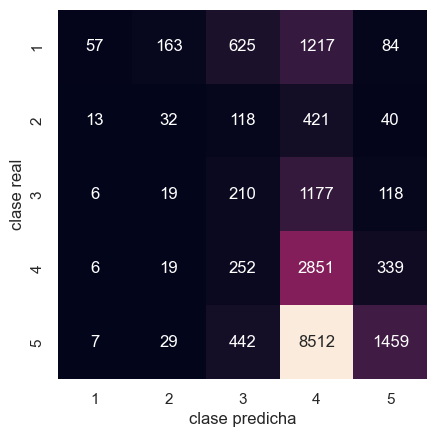

In [206]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as  plt 

print("Score with the test data R^2={0:.4f}".format(grid_search.score(X_test, y_test)))
y_pred_test_pipeline = grid_search.predict(X_test)
predicted_y = np.clip(y_pred_test_pipeline, lower_bound, upper_bound)
mat_conf = metrics.confusion_matrix(np.around(predicted_y), y_test) # código que calcula la matriz de confusión para el conjunto de test

sns.heatmap(mat_conf.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=summary_mean.index,
            yticklabels=summary_mean.index)
plt.xlabel('clase predicha')
plt.ylabel('clase real');

In [207]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./Modelos/sca_ridge.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid_search, file)

with open(model_pkl_file, 'rb') as file:  
    model_sca_ridge = pickle.load(file)

## Testing

In [208]:
test = pd.read_csv('test_set.csv')
test.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty
0,0,delivered,30.00,28.20,2.0,1.0,2017-06-22 20:28:16.000000,2017-06-22 20:42:51.013492,2017-07-14 00:00:00.000000,2017-09-19 15:17:37.767855,NaN,SP,48.0,health_beauty,17.0,547.0,1.0
1,1,delivered,89.90,12.33,1.0,1.0,NaN,2017-11-20 23:34:44.641435,2017-12-01 00:00:00.000000,2017-11-23 14:41:51.640086,Caieiras,SP,NaN,bed_bath_table,58.0,188.0,1.0
2,2,delivered,890.00,86.71,1.0,1.0,2018-02-12 12:31:32.000000,2018-02-15 03:55:50.384756,2018-03-09 00:00:00.000000,2018-02-27 15:19:06.698500,Sao Caetano do Sul,SP,95.0,health_beauty,57.0,537.0,1.0
3,3,delivered,85.00,17.84,1.0,NaN,2017-07-24 05:21:16.000000,NaN,2017-08-15 00:00:00.000000,2017-07-31 19:42:27.819239,Curitiba,PR,813.0,stationery,56.0,303.0,3.0
4,4,delivered,168.98,25.31,1.0,1.0,2018-03-29 22:20:33.000000,2018-03-29 22:30:18.256631,NaN,2018-05-15 15:05:44.342452,Aracaju,SE,490.0,bed_bath_table,60.0,496.0,2.0


In [209]:
test['fecha_deliveried_estdelivery']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_estimated_delivery_date'])).dt.days
test['fecha_deliveried_orderaproved']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_aproved_at'])).dt.days
test['fecha_deliveried_purchased']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_purchase_timestamp'])).dt.days

In [218]:
columnas_modelo =['order_products_value','order_freight_value','order_items_qty','order_sellers_qty',
                 'customer_zip_code_prefix','product_name_lenght',
                 'product_description_lenght','product_photos_qty','fecha_deliveried_estdelivery',
                 'fecha_deliveried_orderaproved','fecha_deliveried_purchased']

In [219]:
test_nuevo = test[columnas_modelo].copy()
sc = StandardScaler()
tes_sc = sc.fit_transform(test_nuevo)
test_scale = pd.DataFrame(tes_sc, columns=test_nuevo.columns)

In [221]:
predict = model_sca_ridge.predict(test_scale)
predicted_test = np.clip(predict, lower_bound, upper_bound)

C:\Users\yajai\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [229]:
y_predict= np.array(np.around(predicted_test)).transpose()
y_predict = pd.DataFrame(y_predict,columns=['target'])
base_final =y_predict.join(test['ID'])[['ID','target']]

In [231]:
base_final.groupby('target').count()

,ID
target,
1.0,58
2.0,175
3.0,1223
4.0,11151
5.0,1193


In [234]:
base_final.to_csv('./Resultados/predict_sca_ridge.csv',index=False)

### Multiclass

In [250]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', HistGradientBoostingClassifier())
])

param_grid = {
    'classifier__learning_rate': [0.01]
}

grid_search_gb = GridSearchCV(pipeline, param_grid, cv=5)

grid_search_gb.fit(X_Base, y_Base)
print("Mejores parámetros: ", grid_search_gb.best_params_)
print("Mejor puntaje: ", grid_search_gb.best_score_)

Mejores parámetros:  {'classifier__learning_rate': 0.01}
Mejor puntaje:  0.7127677614468555


Score with the test data R^2=0.7201


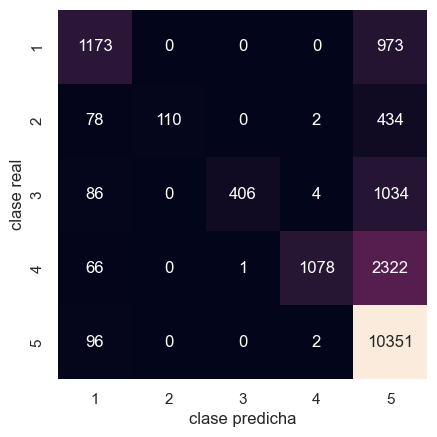

In [251]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as  plt 

print("Score with the test data R^2={0:.4f}".format(grid_search_gb.score(X_test, y_test)))
y_pred_test_pipeline = grid_search_gb.predict(X_test)
mat_conf = metrics.confusion_matrix(y_pred_test_pipeline, y_test) # código que calcula la matriz de confusión para el conjunto de test

sns.heatmap(mat_conf.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=summary_mean.index,
            yticklabels=summary_mean.index)
plt.xlabel('clase predicha')
plt.ylabel('clase real');

In [252]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./Modelos/sca_gb.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid_search_gb, file)

with open(model_pkl_file, 'rb') as file:  
    model_sca_gb = pickle.load(file)

### testing

In [253]:
predict = model_sca_gb.predict(test_scale)

C:\Users\yajai\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [254]:
y_predict = pd.DataFrame(predict,columns=['target'])
base_final =y_predict.join(test['ID'])[['ID','target']]

In [255]:
base_final.groupby('target').count()

,ID
target,
1,969
2,6
3,603
4,1889
5,10333


In [256]:
base_final.to_csv('./Resultados/predict_sca_gb.csv',index=False)

In [472]:
target_fil =['target_1','target_2','target_3','target_4','target_5']

In [473]:
columns_base=[]
for c in train_scale.columns : 
    if c not in target_fil :
        columns_base.append(c)

In [474]:
target = train_scale.loc[:,target_fil].values
Base = train_scale.loc[:,columns_base].values

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42)

In [477]:
gb_hist=[]
for ii in range(5):
    gb = HistGradientBoostingClassifier().fit(X_Base,y_Base[:,ii])
    gb_hist.append(gb)
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_Base,y_Base[:,ii])))

Target_1, R^2=0.91
Target_2, R^2=0.97
Target_3, R^2=0.91
Target_4, R^2=0.81
Target_5, R^2=0.67


In [478]:
for ii in range(5):
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb_hist[ii].score(X_test,y_test[:,ii])))

Target_1, R^2=0.90
Target_2, R^2=0.97
Target_3, R^2=0.92
Target_4, R^2=0.81
Target_5, R^2=0.65


In [479]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score

In [480]:
y_pred_hist=[]
for ii in range(len(target_fil)):
    y_pred = gb_hist[ii].predict(X_test)
    y_pred_hist.append(y_pred)

In [482]:
y_predict= np.array(y_pred_hist).transpose()

In [483]:
y_predict[:,1] ,y_test[:,1]

(array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [484]:
for ii in range(5):
    print('ROC AUC:',roc_auc_score(y_test[:,ii], y_predict[:,ii]))

ROC AUC: 0.6591614563730092
ROC AUC: 0.5
ROC AUC: 0.5
ROC AUC: 0.5
ROC AUC: 0.6064750633962654


In [485]:
y_test[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [509]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_hgb_first_version.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gb_hist, file)

with open(model_pkl_file, 'rb') as file:  
model_first_version = pickle.load(file)

In [510]:
with open(model_pkl_file, 'rb') as file:  
    model_first_version = pickle.load(file)


## Segunda versión

In [549]:
train_scale1 = pd.DataFrame(Xs, columns=train_f.columns)
train_scale1['target'] = train['target'].values.astype('str')

In [550]:
train_scale1=train_scale1.dropna()

In [551]:
target = train_scale1.loc[:,['target']].values
Base = train_scale1.loc[:,columns_base].values

In [552]:
from sklearn.model_selection import train_test_split

In [553]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42,stratify=target)

In [554]:
gb_hist=[]
for ii in range(1):
    gb = HistGradientBoostingClassifier().fit(X_Base,y_Base[:,ii])
    gb_hist.append(gb)
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_Base,y_Base[:,ii])))

Target_1, R^2=0.62


In [555]:
for ii in range(1):
    print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb_hist[ii].score(X_test,y_test[:,ii])))

Target_1, R^2=0.60


In [556]:
y_pred_hist=[]
for ii in range(1):
    y_pred = gb_hist[ii].predict(X_test)
    y_pred_hist.append(y_pred)

In [558]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_hgb_second_version.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gb_hist, file)

with open(model_pkl_file, 'rb') as file:  
    model_second_version = pickle.load(file)

## tercera version

In [638]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [639]:
train_scale2 = pd.DataFrame(Xs, columns=train_f.columns)
train_scale2['target'] = train['target']

In [640]:
train_scale2 =train_scale2.dropna()

In [641]:
target = train_scale2.loc[:,['target']].values
Base = train_scale2.loc[:,columns_base].values

Class=5, n=16982 (57.576%)
Class=1, n=16982 (57.576%)
Class=4, n=16982 (57.576%)
Class=2, n=16982 (57.576%)
Class=3, n=16982 (57.576%)


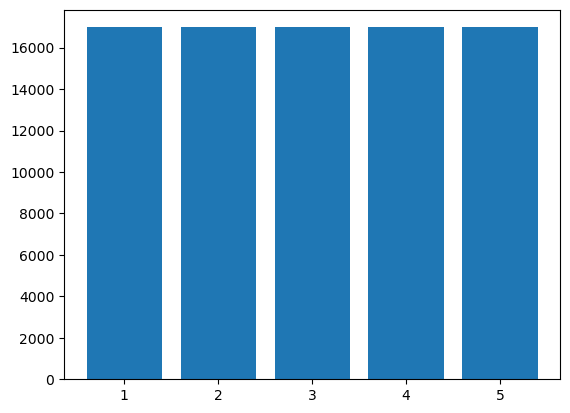

In [642]:
#target = LabelEncoder().fit_transform(target)
# transform the dataset
oversample = SMOTE()
Base1, target1 = oversample.fit_resample(Base, target)
# summarize distribution
counter = Counter(target1)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [647]:
target1.shape

(84910,)

In [648]:
Base1.shape

(84910, 44)

In [643]:
from sklearn.model_selection import train_test_split

In [649]:
X_Base, X_test, y_Base, y_test = train_test_split(Base1,target1, test_size=0.33, random_state=42,stratify=target1)

In [650]:
gb_hist=[]
gb = HistGradientBoostingClassifier().fit(X_Base,y_Base)
print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_Base,y_Base)))

Target_1, R^2=0.69


In [651]:
print('Target_{0:d}, R^2={1:.2f}'.format(ii+1,gb.score(X_test,y_test)))

Target_1, R^2=0.62


In [652]:
y_pred = gb.predict(X_test)

In [653]:
y_pred[0:100],y_test[0:100]

(array([2, 2, 5, 4, 5, 1, 4, 4, 5, 5, 5, 4, 2, 3, 5, 5, 5, 1, 2, 1, 4, 5,
        4, 5, 3, 5, 4, 2, 2, 1, 5, 3, 1, 1, 5, 5, 4, 2, 3, 5, 3, 4, 4, 4,
        5, 2, 5, 5, 4, 4, 2, 5, 3, 5, 4, 3, 4, 1, 5, 4, 5, 1, 1, 2, 5, 1,
        1, 5, 3, 2, 2, 5, 5, 1, 3, 4, 5, 2, 5, 3, 5, 2, 2, 4, 3, 3, 4, 5,
        4, 4, 1, 5, 2, 3, 3, 1, 1, 5, 1, 3], dtype=int64),
 array([3, 1, 5, 4, 4, 1, 5, 4, 3, 4, 4, 4, 2, 1, 1, 5, 1, 4, 2, 2, 4, 5,
        2, 5, 3, 4, 1, 2, 4, 2, 5, 3, 1, 1, 5, 5, 4, 4, 3, 5, 1, 2, 4, 3,
        5, 2, 5, 2, 3, 4, 2, 3, 3, 5, 4, 3, 1, 1, 4, 3, 5, 1, 1, 3, 5, 1,
        3, 1, 3, 2, 2, 5, 1, 5, 4, 4, 5, 1, 5, 3, 2, 4, 2, 4, 4, 3, 1, 5,
        2, 4, 1, 1, 2, 3, 3, 1, 1, 5, 1, 3], dtype=int64))

In [654]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model_hgb_tercer_version.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(gb, file)

In [655]:
model_pkl_file = "model_hgb_tercer_version.pkl"  
with open(model_pkl_file, 'rb') as file:  
    model_tercer_version = pickle.load(file)


In [463]:
model.score(Base1,target)

0.589963768115942

## cuarta version 

In [677]:
train_scale1 = pd.DataFrame(Xs, columns=train_f.columns)
train_scale1['target'] = train['target'].values
train_scale1 = train_scale1.dropna()
target = train_scale1.loc[:,['target']].values
Base = train_scale1.loc[:,columns_base].values

In [678]:
X_Base, X_test, y_Base, y_test = train_test_split(Base,target, test_size=0.33, random_state=42,stratify=target)

In [686]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lm = LinearRegression()

lm.fit(X_Base, y_Base)

predictions_train = lm.predict(X_Base)
predictions_test = lm.predict(X_test)

mean_absolute_error(predictions_train, y_Base)
np.sqrt(mean_squared_error(predictions_train, y_Base))
mean_absolute_error(predictions_test, y_test)
np.sqrt(mean_squared_error(predictions_test, y_test))
r2_score(predictions_train, y_Base) ,r2_score(predictions_test, y_test)

(-5.162242080440373, -0.00041109968892572013)

In [687]:
predictions_test ,y_test 

(array([[4.37998962],
        [4.42573547],
        [3.9332428 ],
        ...,
        [2.89260864],
        [4.33010864],
        [3.31425476]]),
 array([[5],
        [5],
        [1],
        ...,
        [1],
        [3],
        [5]], dtype=int64))

## Aplicando al test

In [11]:
test = pd.read_csv('test_set.csv')
test.head()

,ID,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty
0,0,delivered,30.00,28.20,2.0,1.0,2017-06-22 20:28:16.000000,2017-06-22 20:42:51.013492,2017-07-14 00:00:00.000000,2017-09-19 15:17:37.767855,NaN,SP,48.0,health_beauty,17.0,547.0,1.0
1,1,delivered,89.90,12.33,1.0,1.0,NaN,2017-11-20 23:34:44.641435,2017-12-01 00:00:00.000000,2017-11-23 14:41:51.640086,Caieiras,SP,NaN,bed_bath_table,58.0,188.0,1.0
2,2,delivered,890.00,86.71,1.0,1.0,2018-02-12 12:31:32.000000,2018-02-15 03:55:50.384756,2018-03-09 00:00:00.000000,2018-02-27 15:19:06.698500,Sao Caetano do Sul,SP,95.0,health_beauty,57.0,537.0,1.0
3,3,delivered,85.00,17.84,1.0,NaN,2017-07-24 05:21:16.000000,NaN,2017-08-15 00:00:00.000000,2017-07-31 19:42:27.819239,Curitiba,PR,813.0,stationery,56.0,303.0,3.0
4,4,delivered,168.98,25.31,1.0,1.0,2018-03-29 22:20:33.000000,2018-03-29 22:30:18.256631,NaN,2018-05-15 15:05:44.342452,Aracaju,SE,490.0,bed_bath_table,60.0,496.0,2.0


In [501]:
test['fecha_deliveried_estdelivery']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_estimated_delivery_date'])).dt.days
test['fecha_deliveried_orderaproved']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_aproved_at'])).dt.days
test['fecha_deliveried_purchased']  =  (pd.to_datetime(test['order_delivered_customer_date']) - pd.to_datetime(test['order_purchase_timestamp'])).dt.days

In [502]:
columns= test.columns

In [503]:
date_columns = ['order_delivered_customer_date','order_estimated_delivery_date','order_aproved_at','order_purchase_timestamp']
cities_columns = ['customer_city']
product_name = ['product_category_name_english']
ID = ['ID']

In [504]:
columns_f=[]
for c in columns : 
    if c not in date_columns and c not in cities_columns and c not in product_name and c not in ID: 
            columns_f.append(c)

In [505]:
test_f = pd.get_dummies(test[columns_f])

In [506]:
sc = StandardScaler()
Xs = sc.fit_transform(test_f)

In [507]:
test_scale = pd.DataFrame(Xs, columns=test_f.columns)

In [661]:
y_pred_hist=[]
for ii in range(5):
    y_pred = model_first_version[ii].predict(test_scale.values)
    y_pred_hist.append(y_pred)

In [662]:
y_predict= np.array(y_pred_hist).transpose()

In [663]:
y_pred = pd.DataFrame(y_predict,columns=['1','2','3','4','5'])

In [664]:
base_final = y_pred.join(test['ID'])

In [665]:
base_final

,1,2,3,4,5,ID
0,0,0,0,0,0,0
1,0,0,0,0,1,1
2,0,0,0,0,1,2
3,0,0,0,0,1,3
4,0,0,0,0,0,4
...,...,...,...,...,...,...
13795,0,0,0,0,1,13795
13796,0,0,0,0,1,13796
13797,0,0,0,0,1,13797
13798,0,0,0,0,1,13798


In [668]:
conditionlist = [
    (base_final['1']==1),
    (base_final['2']==1),
    (base_final['3']==1),
    (base_final['4']==1)]
choicelist = [1, 2, 3, 4]
base_final['target'] = np.select(conditionlist, choicelist, default=5)

In [670]:
base_final.groupby('target').count()

,1,2,3,4,5,ID
target,,,,,,
1,583,583,583,583,583,583
5,13217,13217,13217,13217,13217,13217


In [671]:
base = base_final[['ID','target']]

In [672]:
base.to_csv('submission_primer_version.csv',index=False)

In [ ]:
# segunda Version

In [ ]:
model_second_version

In [584]:
y_pred_hist=[]
for ii in range(1):
    y_pred = model_second_version[ii].predict(test_scale.values)
    y_pred_hist.append(y_pred)

In [585]:
y_pred_hist

[array(['1', '5', '5', ..., '5', '5', '5'], dtype=object)]

In [586]:
y_pred = pd.DataFrame(np.array(y_pred_hist).transpose(),columns=['target'])

In [587]:
base_final2 = y_pred.join(test['ID'])
base = base_final2[['ID','target']]

In [589]:
base

,ID,target
0,0,1
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
13795,13795,5
13796,13796,5
13797,13797,5
13798,13798,5


In [590]:
base.groupby('target').count()

,ID
target,
1,849
2,1
3,4
4,21
5,12925


In [592]:
base.to_csv('submission.csv',index=False)

In [591]:
base.count()

ID        13800
target    13800
dtype: int64

## tercera version

In [656]:
y_pred = model_tercer_version.predict(test_scale.values)

In [657]:
y_pred = pd.DataFrame(np.array(y_pred).transpose(),columns=['target'])

In [658]:
base_final2 = y_pred.join(test['ID'])
base = base_final2[['ID','target']]

In [659]:
base.groupby('target').count()

,ID
target,
1,2768
2,9243
3,1591
4,157
5,41


In [660]:
base.to_csv('submission_tercer_version.csv',index=False)